<a href="https://colab.research.google.com/github/v0robaa/basicAI/blob/main/5-DataProc/Task_DataAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание по анализу данных и визуализации

Этапы работы:
- Выбрать данные, которые вам интересны, предпочтительно в табличной форме (Excel, CSV)
- С помощью Pandas провести какой-то анализ данных и визуализацию
- По возможности стилизовать визуализацию, чтобы получить некоторую консистентную инфографику в оригинальном стиле

### Выбор данных

Рекомендумые ресурсы для поиска данных:
* [Список от Yandex](https://yandex.ru/project/oda/useful)
* [Kaggle](http://Kaggle.com) – сайт соревований для датасайнтистов. Там же можно искать код
* Открытые данные:
  - ищите в интернете по этим ключевым словам
  - https://data.world/datasets/open-data
* Различные текстовые данные, из которых можно извлечь что-то интересное:
  - Видео на YouTube, у которых есть субтитры, или которые можно преобразовать в текст (см. пример)
  - Библиотеки книг: [lib.ru](http://lib.ru), [Project Gutenberg](https://www.gutenberg.org/) и др.
* Статьи:
  - [15 of the Best Free Open Data Sources for 2024](https://careerfoundry.com/en/blog/data-analytics/open-data-sources/)

### Анализ данных

Для анализа данных используем Pandas. Если вы не знаете, как сделать какую-то операцию:
* Ищем в интернет (как правило, хорошие ответы находятся на сайте stackoverflow.com)
* Спрашиваем [у ChatGPT](https://soshnikov.com/ai/how-to-use-chatgpt-ru/)

**Мною была выбрана база данных, в которой собраны самые прослушиваемые артисты за март 2024 года на сервисе Spotify.**

In [6]:
import pandas as pd

df = pd.read_csv('https://query.data.world/s/ctymem3lkkqif746b5c57xqpkfuwz3?dws=00000')

Рассмотрим форматирование таблицы - выведем 5 первых строк,количество строк и колонок.

In [23]:
df.head()

,Artist,Listeners,Daily Trend,Peak,Peak Listeners
0,The Weeknd,116503070,-47926,1,117203987
1,Taylor Swift,105461681,82615,1,111229612
2,Drake,84653760,8447,3,86591246
3,Rihanna,83691084,37585,2,83691084
4,Ariana Grande,80276594,-160153,3,99648377


In [24]:
print(df.shape)

(2500, 5)


В колонках содержится следующая информация:

*   название группы/имя артиста
*   количество слушателей на момент сбора информации
*   динамика количества слушателей
*   максимальная позиция в рейтинге по количеству слушателей за все время
*   максимальное количество слушателей/мес за все время







Оформим данные о текущих лидерах в виде диаграммы.  

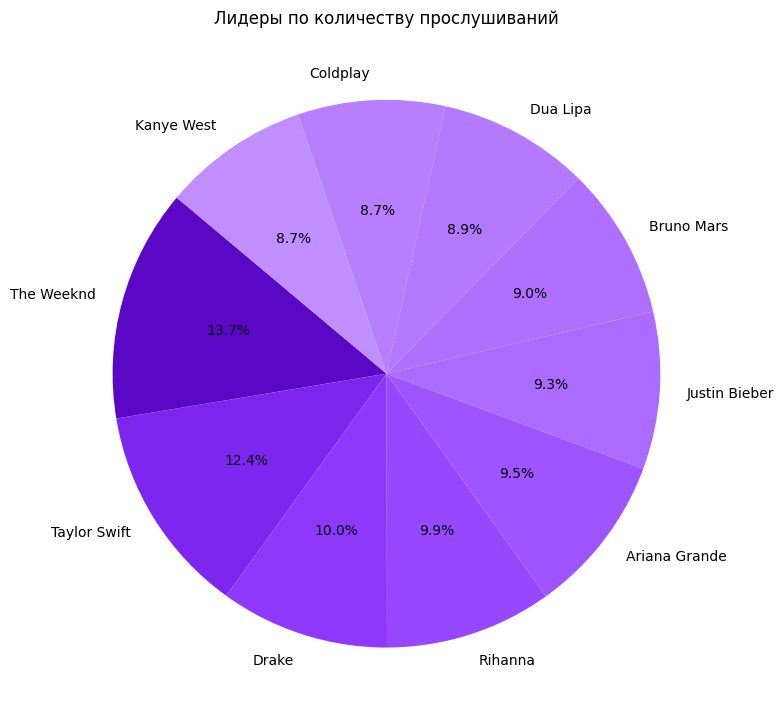

In [46]:
top_artists = df['Artist'].head(10)
top_listeners = df['Listeners'].head(10)


plt.figure(figsize=(8, 8))
colors = ['#5A08C6', '#7D26EF','#8E38FD','#9747FF','#9E55FF','#AB6BFF','#AF70FF','#B379FF','#B77FFF','#C08EFF']
plt.pie(top_listeners, labels=top_artists, colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Лидеры по количеству прослушиваний')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Создадим диаграмму, в которой будут исполнители, которые когда-либо попадали в топ-10 рейтинга. Для начала сформируем вспомогательный датасет.

In [26]:
top_10 = df.loc[(df['Peak'] >= 1) & (df['Peak'] <= 10), 'Artist']
top_10_data = df[df['Artist'].isin(top_10)]
print(top_10_data)

            Artist  Listeners  Daily Trend  Peak  Peak Listeners
0       The Weeknd  116503070       -47926     1       117203987
1     Taylor Swift  105461681        82615     1       111229612
2            Drake   84653760         8447     3        86591246
3          Rihanna   83691084        37585     2        83691084
4    Ariana Grande   80276594      -160153     3        99648377
5    Justin Bieber   78841419       106155     3        95396733
6       Bruno Mars   76241952       216614     7        76241952
7         Dua Lipa   75507732       228768     3        77778397
8         Coldplay   73810255       -83858     7        78540616
9       Kanye West   73409698       524476    10        73409698
10      Ed Sheeran   72489128        -3109     2        87934910
11    David Guetta   71143534        43876     4        75163500
12          Eminem   70857612      -102960    10        73655054
13       Bad Bunny   70476859      -107364     3        84533787
14             SZA   6845

Теперь составим наглядный график по новому датасету, покажем сколько прослушиваний было у каждого из артистов.

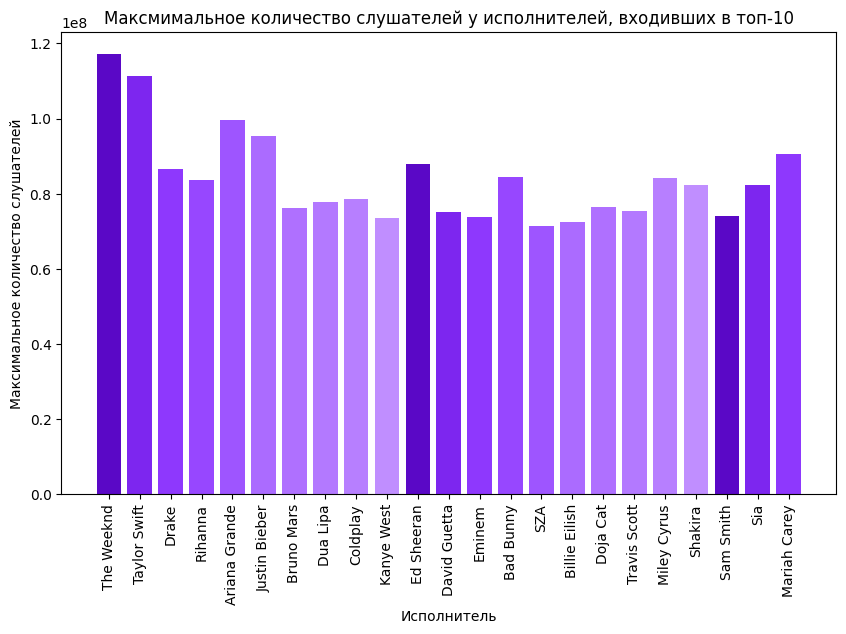

In [48]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(top_10_data['Artist'], top_10_data['Peak Listeners'], color=colors)
plt.xlabel('Исполнитель')
plt.ylabel('Максимальное количество слушателей')
plt.title('Максмимальное количество слушателей у исполнителей, входивших в топ-10')
plt.xticks(rotation=90)
plt.show()

Тренд - важный показатель, по нему можно понять, какой артист вероятнее всего поднимется в рейтинге, а какой уступит позицию.

Создадим диаграмму с отображанием исполнителей с наиболшим приростом слушателей и артиствов с наихудшим трендом.

Анализировать будем артистов из первой сотни, так как изменения в этой части рейтинга значительны.


In [96]:
df_100 = df.head(100)

top5_largest = df_100.nlargest(5, 'Daily Trend')[['Artist', 'Daily Trend']]
top5_smallest = df_100.nsmallest(5, 'Daily Trend')[['Artist', 'Daily Trend']]

print("Топ 5 наибольших трендов:")
print(top5_largest)
print()
print("Топ 5 наименьших трендов:")
print(top5_smallest)

Топ 5 наибольших трендов:
           Artist  Daily Trend
23        Beyoncé      1239045
70   Benson Boone       766685
60  Ty Dolla $ign       740664
9      Kanye West       524476
57  Playboi Carti       486552

Топ 5 наименьших трендов:
           Artist  Daily Trend
36    Jack Harlow      -269341
55        Madonna      -268008
17       Doja Cat      -197302
86         Anitta      -178007
4   Ariana Grande      -160153


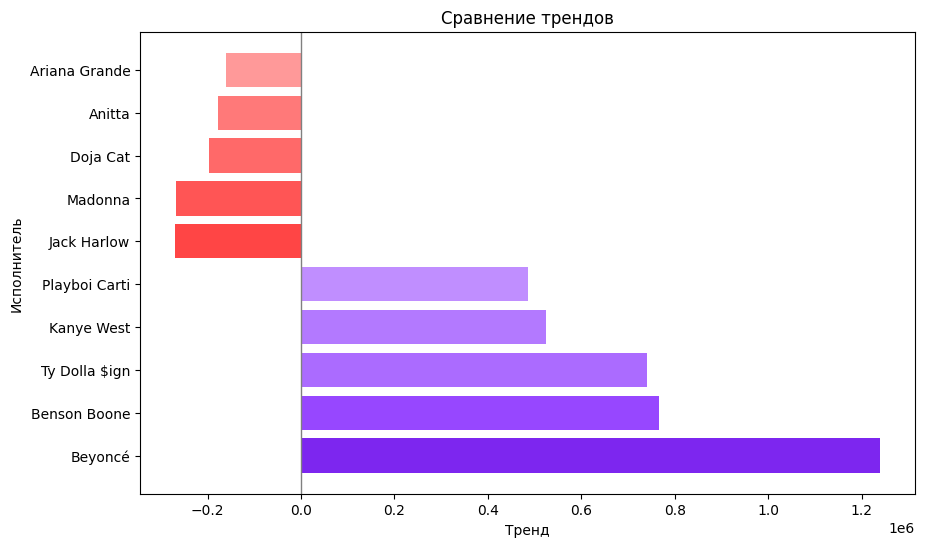

In [95]:
plt.figure(figsize=(10, 6))
color_2 = ['#7D26EF', '#9747FF', '#AB6BFF', '#B379FF', '#C08EFF', '#FF4545', '#FF5555', '#FF6969', '#FF7979', '#FF9999']
artists = top5_largest['Artist'].tolist() + top5_smallest['Artist'].tolist()
trends = top5_largest['Daily Trend'].tolist() + top5_smallest['Daily Trend'].tolist()
bars = plt.barh(artists, trends, color=color_2)


plt.xlabel('Тренд')
plt.ylabel('Исполнитель')
plt.title('Сравнение трендов')
plt.axvline(x=0, color='gray', linewidth=1)
plt.show()

Воспользуемся библиотекой sklearn для предсказания изменения рейтинга. Данных для корректного анализа мало, но по построенной модели на основе тренда можно получить потенциальный рейтинг.

Скопируем необходимые для предсказания данные в новый датасет, проанализируем, а затем отсортируем его по параметру предсказанных слушателей.

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


data_subset = df[['Artist', 'Listeners', 'Daily Trend']].head(100)


X = data_subset['Daily Trend'].values.reshape(-1, 1)
y = data_subset['Listeners'].values


model = LinearRegression()
model.fit(X, y)

pd.set_option('display.float_format', lambda x: '%.0f' % x)
new_data = data_subset.copy()
new_data['predicted_listeners'] = model.predict(X)
new_data_sorted = new_data.sort_values(by='predicted_listeners', ascending=False)
print(new_data_sorted)

           Artist  Listeners  Daily Trend  predicted_listeners
23        Beyoncé   61529500      1239045             53672515
70   Benson Boone   40921540       766685             53087222
60  Ty Dolla $ign   44128254       740664             53054980
9      Kanye West   73409698       524476             52787105
57  Playboi Carti   46123040       486552             52740115
..            ...        ...          ...                  ...
4   Ariana Grande   80276594      -160153             51938794
86         Anitta   37751034      -178007             51916671
17       Doja Cat   65519598      -197302             51892763
55        Madonna   47047866      -268008             51805153
36    Jack Harlow   53092507      -269341             51803501

[100 rows x 4 columns]


Построим диаграмму на основе нового рейтинга и посмотрим, как теперь будет выглядеть топ-10.

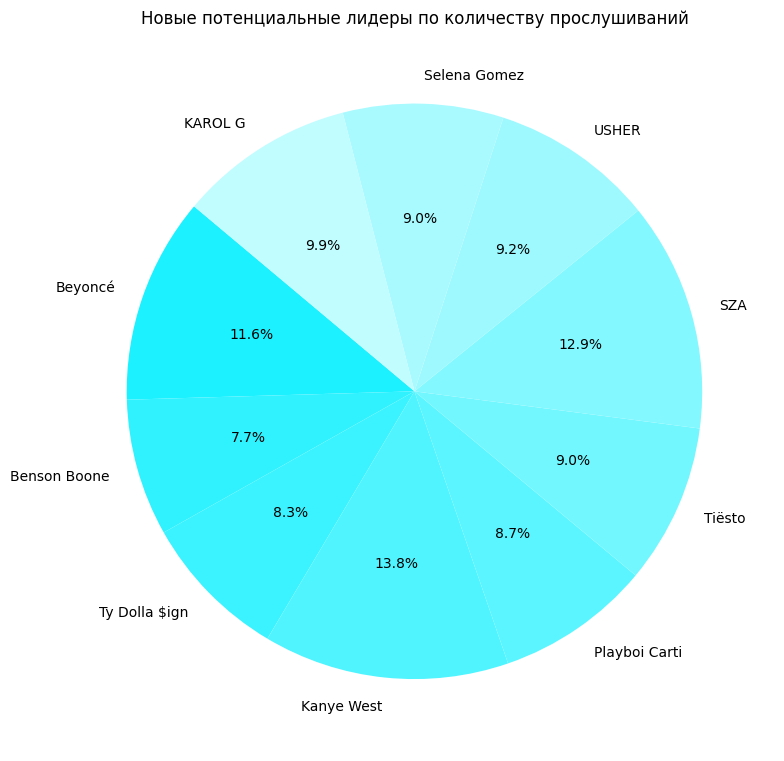

In [127]:
top_artists_2 = new_data_sorted['Artist'].head(10)
top_listeners_2 = new_data_sorted['Listeners'].head(10)

plt.figure(figsize=(8, 8))
colors = ['#1CF1FF', '#30F2FF','#3AF3FF','#50F4FF','#5BF5FF','#73F7FF','#84F8FF','#9EF9FF','#A9FAFF','#C1FCFF']
plt.pie(top_listeners_2, labels=top_artists_2, colors = colors, autopct='%1.1f%%', startangle=140)
plt.title('Новые потенциальные лидеры по количеству прослушиваний')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Интересно пронаблюдать наибольшее смещение в позицициях.

Для этого сравним два датасета и отразим на диаграмме.

In [160]:
ds1 = data_subset.copy()
#print(ds1)

ds2 = new_data_sorted.copy()
ds2['Listeners'] = ds2['predicted_listeners']
ds2.drop('predicted_listeners', axis=1, inplace=True)
ds2 = ds2.reset_index(drop=True)
ds2['index'] = ds2.index
#print(ds2)


merged_ds = pd.merge(ds1, ds2, on=['Artist', 'Daily Trend'], how='inner')

merged_ds['Position_Difference'] = merged_ds.index_y - merged_ds.index_x
top_10_fallen_rows = merged_ds.nlargest(10, 'Position_Difference')

print(top_10_fallen_rows)

           Artist  Listeners_x  Daily Trend  index_x  Listeners_y  index_y  \
4   Ariana Grande     80276594      -160153        4     51938794       95   
0      The Weeknd    116503070       -47926        0     52077852       81   
17       Doja Cat     65519598      -197302       17     51892763       97   
8        Coldplay     73810255       -83858        8     52033330       87   
12         Eminem     70857612      -102960       12     52009661       89   
13      Bad Bunny     70476859      -107364       13     52004204       90   
18      21 Savage     65500427      -116218       18     51993233       93   
30     Peso Pluma     58346739      -155663       30     51944357       94   
36    Jack Harlow     53092507      -269341       36     51803501       99   
15     Marshmello     67075438       -26737       15     52104107       76   

    Position_Difference  
4                    91  
0                    81  
17                   80  
8                    79  
12         

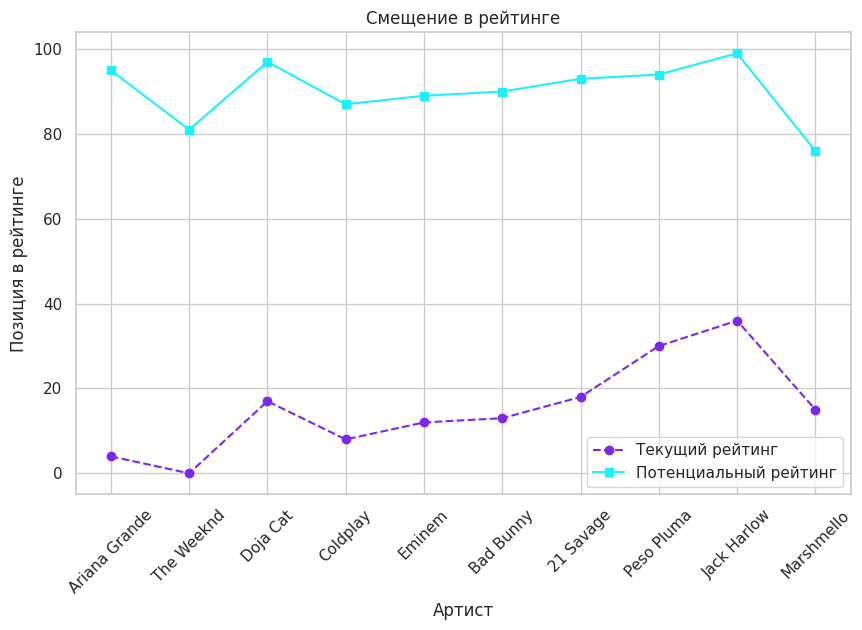

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_fallen_rows['Artist'], top_10_fallen_rows['index_x'], marker='o', linestyle='--', color='#7D26EF', label='Текущий рейтинг')
plt.plot(top_10_fallen_rows['Artist'], top_10_fallen_rows['index_y'], marker='s', linestyle='-', color='#1CF1FF', label='Потенциальный рейтинг')

plt.title('Смещение в рейтинге')
plt.xlabel('Артист')
plt.ylabel('Позиция в рейтинге')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()